# Linear Regression

Linear Regression is one of the easiest algorithms in machine learning. In this post we will explore this algorithm and we will implement it using Python from scratch.

As the name suggests this algorithm is applicable for Regression problems. Linear Regression is a **Linear Model**. Which means, we will establish a linear relationship between the input variables(**X**) and single output variable(**Y**). When the input(**X**) is a single variable this model is called **Simple Linear Regression** and when there are mutiple input variables(**X**), it is called **Multiple Linear Regression**.

## Simple Linear Regression

We discussed that Linear Regression is a simple model. Simple Linear Regression is the simplest model in machine learning.

### Model Representation

In this problem we have an input variable - **X** and one output variable - **Y**. And we want to build linear relationship between these variables. Here the input variable is called **Independent Variable** and the output variable is called **Dependent Variable**. We can define this linear relationship as follows:

\\[Y = \beta_0 + \beta_1X\\]

The \\(\beta_1\\) is called a scale factor or **coefficient** and \\(\beta_0\\) is called **bias coefficient**. The bias coeffient gives an extra degree of freedom to this model. This equation is similar to the line equation \\(y = mx + b\\) with \\(m = \beta_1\\)(Slope) and \\(b = \beta_0\\)(Intercept). So in this Simple Linear Regression model we want to draw a line between X and Y which estimates the relationship between X and Y.

But how do we find these coefficients? That's the learning procedure. We can find these using different approaches. One is called **Ordinary Least Square Method** and other one is called **Gradient Descent Approach**. We will use Ordinary Least Square Method in Simple Linear Regression and Gradient Descent Approach in Multiple Linear Regression in post.

### Ordinary Least Square Method

Earlier in this post we discussed that we are going to approximate the relationship between X and Y to a line. Let's say we have few inputs and outputs. And we plot these scatter points in 2D space, we will get something like the following image.

![Linear Regression](https://i.imgur.com/pXEpE6x.png)

And you can see a line in the image. That's what we are going to accomplish. And we want to minimize the error of out model. A good model will always have least error. We can find this line by reducing the error. The error of each point is the distance between line and that point. This is illustrated as follows.

![Residue](https://i.imgur.com/306wvA1.png)

And total error of this model is the sum of all errors of each point. ie.

\\[D = \sum_{i=1}^{m} d_i^2\\]

\\(d_i\\) - Distance between line and i<sup>th</sup> point.

\\(m\\) - Total number of points

You might have noticed that we are squaring each of the distances. This is because, some points will be above the line and some points will be below the line. We can minimize the error in the model by minimizing \\(D\\). And after the mathematics of minimizing \\(D\\), we will get;

\\[\beta_1 = \frac{\sum_{i=1}^{m} (x_i - \bar{x})(y_i - \bar{y})}{\sum_{i=1}^{m} (x_i - \bar{x})^2}\\]

\\[\beta_0 = \bar{y} - \beta_1\bar{x}\\]

In these equations \\(\bar{x}\\) is the mean value of input variable **X** and \\(\bar{y}\\) is the mean value of output variable **Y**.

Now we have the model. This method is called [**Ordinary Least Square Method**](https://www.wikiwand.com/en/Ordinary_least_squares). Now we will implement this model in Python.

\\[Y = \beta_0 + \beta_1X\\]

\\[\beta_1 = \frac{\sum_{i=1}^{m} (x_i - \bar{x})(y_i - \bar{y})}{\sum_{i=1}^{m} (x_i - \bar{x})^2}\\]

\\[\beta_0 = \bar{y} - \beta_1\bar{x}\\]


## Approach and methodology

We will adopt the OSEMiN data science workflow, which involves:

Obtain (import the data)

Scrub (clean the data, deal with missing values and data types)

Explore (answer descriptives questions using EDA)

Model (build our predictive model)

Interpret (comment on our model and findings)

In [1]:
# Import libraries

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib as mpl
import seaborn as sns


## Prepare Data and Check information

In [2]:
df = pd.read_csv ('dataset/kc_house_data.csv')

In [3]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [4]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

### Change data type

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [6]:
# change date to datetime formati
df['date'] = pd.to_datetime(df['date'])

In [7]:
# check again
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             21613 non-null  int64         
 1   date           21613 non-null  datetime64[ns]
 2   price          21613 non-null  float64       
 3   bedrooms       21613 non-null  int64         
 4   bathrooms      21613 non-null  float64       
 5   sqft_living    21613 non-null  int64         
 6   sqft_lot       21613 non-null  int64         
 7   floors         21613 non-null  float64       
 8   waterfront     21613 non-null  int64         
 9   view           21613 non-null  int64         
 10  condition      21613 non-null  int64         
 11  grade          21613 non-null  int64         
 12  sqft_above     21613 non-null  int64         
 13  sqft_basement  21613 non-null  int64         
 14  yr_built       21613 non-null  int64         
 15  yr_renovated   2161

In [8]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


### Replace Null value

In [9]:
df.isnull().count()

id               21613
date             21613
price            21613
bedrooms         21613
bathrooms        21613
sqft_living      21613
sqft_lot         21613
floors           21613
waterfront       21613
view             21613
condition        21613
grade            21613
sqft_above       21613
sqft_basement    21613
yr_built         21613
yr_renovated     21613
zipcode          21613
lat              21613
long             21613
sqft_living15    21613
sqft_lot15       21613
dtype: int64

In [10]:
# Get number of missing values in each column
df.isna().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

### Check duplicated values

In [11]:
# Cheking for duplicated rows
duplicates = df[df.duplicated()]
print(len(duplicates))

0


In [12]:
# Cheking for rows with same id
duplicates = df[df.duplicated(subset=['id'])]
print(len(duplicates))

177


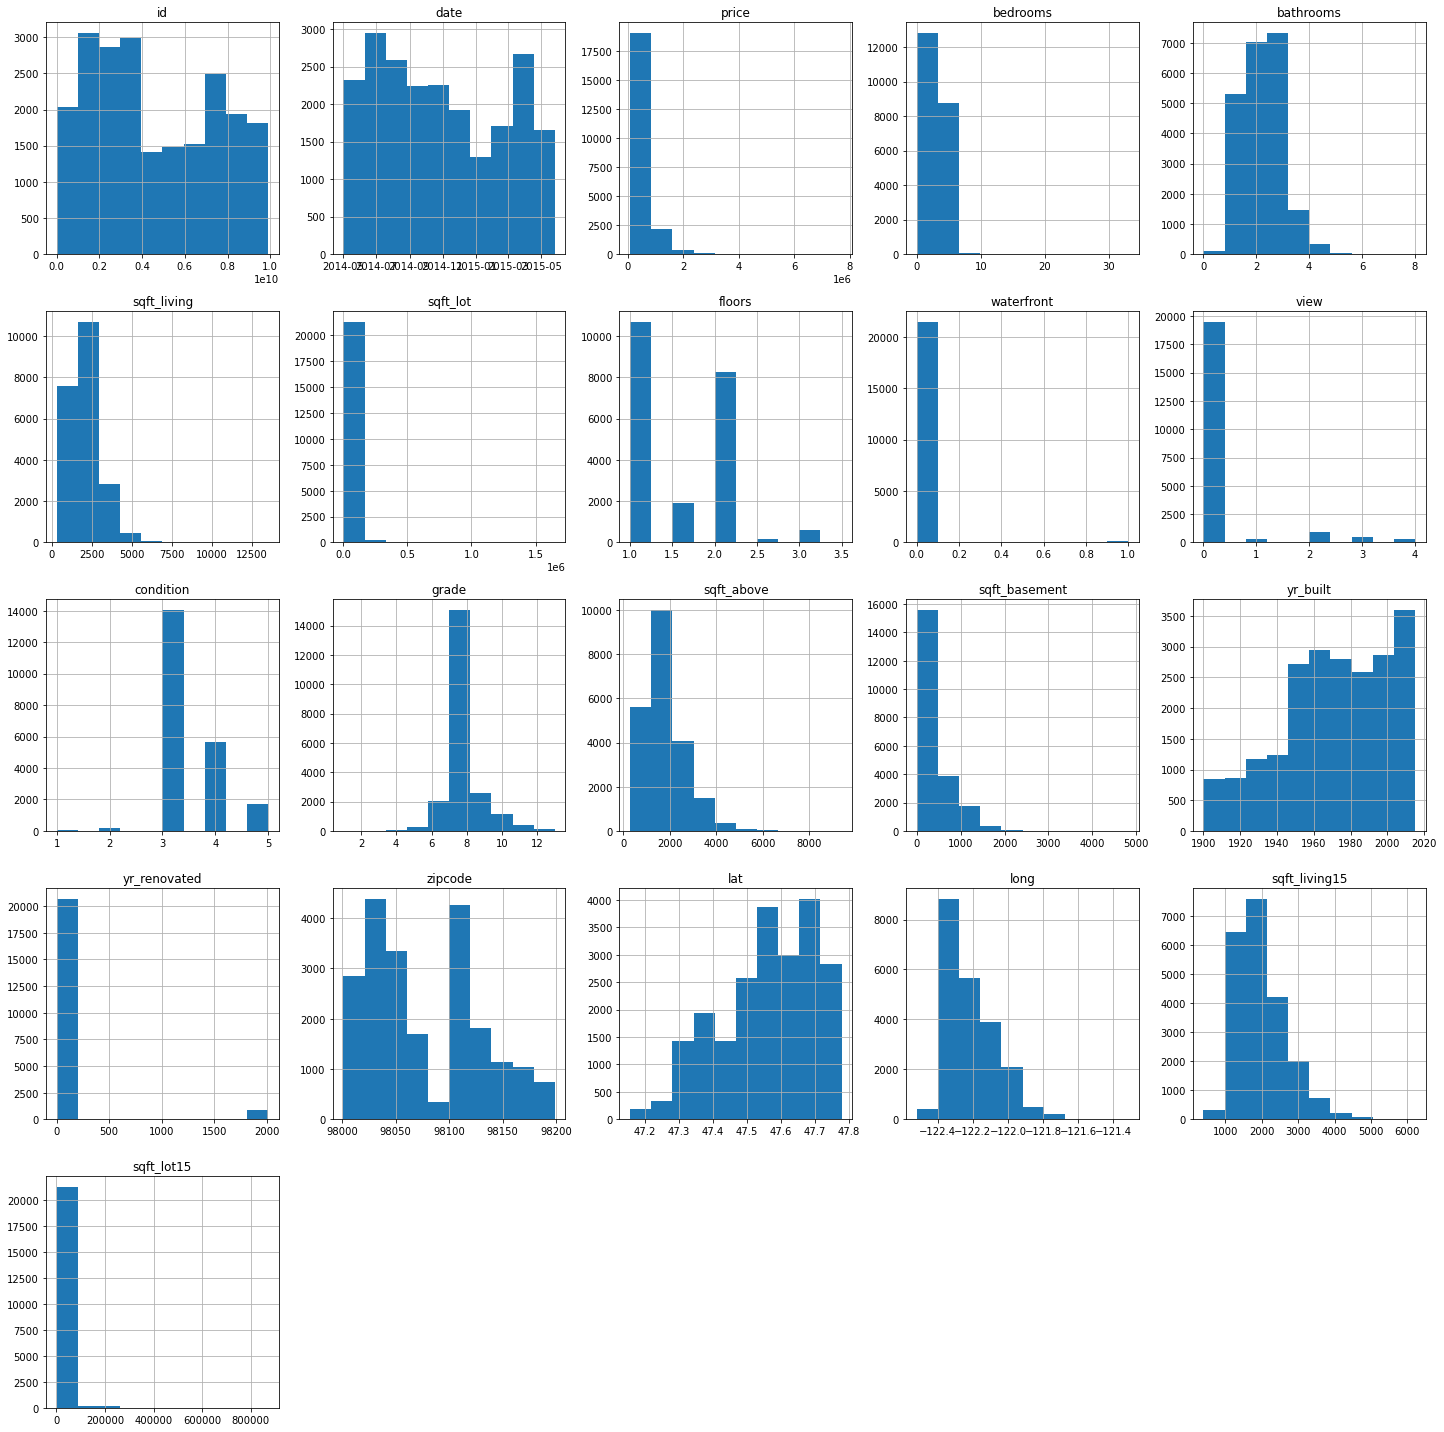

In [13]:
# View the distributions using histograms to get a sense of the spread of the various features.
# How to remove ID and date????

df.hist(figsize = (20,20))
plt.tight_layout()
plt.show()

we note that most of the  price under 3,000,000$, we need remove the outliers;

number of bedrooms should be less than 10; 

number of bathrooms should be less than 6; 

-sqft_living <  7500;

-sqft_lot < 500,000;

-waterfront should be a binary 1/0 feature;

-yr_renovated shold remove value '0';

-sqft_lot15 should < 200,000


We will consider potential outliers in bedrooms, bathrooms and the sqft-type features.

### Investigate bedrooms

In [14]:
# Investigate bedrooms
df['bedrooms'].value_counts()

3     9824
4     6882
2     2760
5     1601
6      272
1      199
7       38
0       13
8       13
9        6
10       3
11       1
33       1
Name: bedrooms, dtype: int64

In [15]:
# Find the records with bedroom=33
df[df['bedrooms'] == 33]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
15870,2402100895,2014-06-25,640000.0,33,1.75,1620,6000,1.0,0,0,...,7,1040,580,1947,0,98103,47.6878,-122.331,1330,4700


In [16]:
# This 33 should be a typo of 3, and we correct it
# Fix typo for bedrooms
df.loc[15870, 'bedrooms'] = 3

In [17]:
# Check again
df.loc[15870]

id                        2402100895
date             2014-06-25 00:00:00
price                       640000.0
bedrooms                           3
bathrooms                       1.75
sqft_living                     1620
sqft_lot                        6000
floors                           1.0
waterfront                         0
view                               0
condition                          5
grade                              7
sqft_above                      1040
sqft_basement                    580
yr_built                        1947
yr_renovated                       0
zipcode                        98103
lat                          47.6878
long                        -122.331
sqft_living15                   1330
sqft_lot15                      4700
Name: 15870, dtype: object

### Define function to remove outliers
def remove_outliers(df):
    '''removes entries with z-score above 3 for specific columns'''
    variables = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'sqft_above', 
                 'lat', 'long', 'sqft_living15', 'sqft_lot15']
    
    for variable in variables:
        df = df[np.abs(df[variable]-df[variable].mean()) <= (3*df[variable].std())]
        
    return df

### Investigate price

In [18]:
df['price'].describe().round(0)

count      21613.0
mean      540088.0
std       367127.0
min        75000.0
25%       321950.0
50%       450000.0
75%       645000.0
max      7700000.0
Name: price, dtype: float64

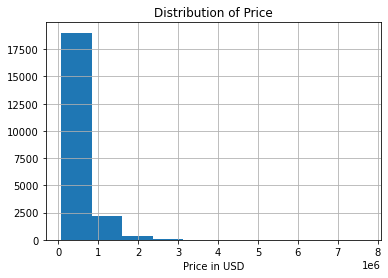

In [19]:
# View price distribution
df['price'].hist()
plt.xlabel('Price in USD')
plt.title('Distribution of Price')
plt.show()

In [20]:
# Find the records with price > 4,000,000$
df[df['price'] >= 4000000]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
1164,1247600105,2014-10-20,5110800.0,5,5.25,8010,45517,2.0,1,4,...,12,5990,2020,1999,0,98033,47.6767,-122.211,3430,26788
1315,7558700030,2015-04-13,5300000.0,6,6.00,7390,24829,2.0,1,4,...,12,5000,2390,1991,0,98040,47.5631,-122.210,4320,24619
1448,8907500070,2015-04-13,5350000.0,5,5.00,8000,23985,2.0,0,4,...,12,6720,1280,2009,0,98004,47.6232,-122.220,4600,21750
2626,7738500731,2014-08-15,4500000.0,5,5.50,6640,40014,2.0,1,4,...,12,6350,290,2004,0,98155,47.7493,-122.280,3030,23408
3914,9808700762,2014-06-11,7062500.0,5,4.50,10040,37325,2.0,1,2,...,11,7680,2360,1940,2001,98004,47.6500,-122.214,3930,25449
4149,6447300265,2014-10-14,4000000.0,4,5.50,7080,16573,2.0,0,0,...,12,5760,1320,2008,0,98039,47.6151,-122.224,3140,15996
4411,2470100110,2014-08-04,5570000.0,5,5.75,9200,35069,2.0,0,0,...,13,6200,3000,2001,0,98039,47.6289,-122.233,3560,24345
7252,6762700020,2014-10-13,7700000.0,6,8.00,12050,27600,2.5,0,3,...,13,8570,3480,1910,1987,98102,47.6298,-122.323,3940,8800
8092,1924059029,2014-06-17,4668000.0,5,6.75,9640,13068,1.0,1,4,...,12,4820,4820,1983,2009,98040,47.5570,-122.210,3270,10454
8638,3835500195,2014-06-18,4489000.0,4,3.00,6430,27517,2.0,0,0,...,12,6430,0,2001,0,98004,47.6208,-122.219,3720,14592


In [21]:
df_less4 = df[df['price'] <= 4000000]

In [22]:
df_less4['price'].describe().round(0)

count      21602.0
mean      537547.0
std       348598.0
min        75000.0
25%       321500.0
50%       450000.0
75%       645000.0
max      4000000.0
Name: price, dtype: float64

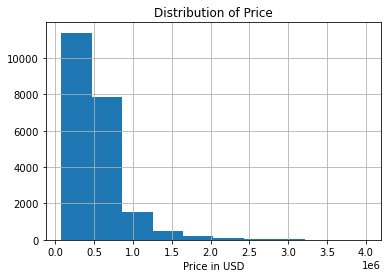

In [23]:
# View price distribution
df_less4['price'].hist()
plt.xlabel('Price in USD')
plt.title ('Distribution of Price')
plt.show()

In [24]:
# Look at 0.9 percentile
for i in range (90,100):
    q = i/100
    quantile = df['price'].quantile(q = q)
    print(f'{q} percentile: {round(quantile,3)}')

0.9 percentile: 887000.0
0.91 percentile: 919999.2
0.92 percentile: 950000.0
0.93 percentile: 998000.0
0.94 percentile: 1063560.0
0.95 percentile: 1156480.0
0.96 percentile: 1259040.0
0.97 percentile: 1388000.0
0.98 percentile: 1600000.0
0.99 percentile: 1964400.0


### Investigate sqft_living

In [25]:
df['sqft_living'].describe().round(0)

count    21613.0
mean      2080.0
std        918.0
min        290.0
25%       1427.0
50%       1910.0
75%       2550.0
max      13540.0
Name: sqft_living, dtype: float64

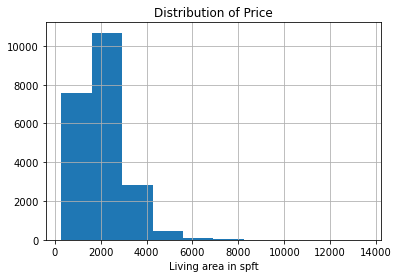

In [26]:
# View price distribution
df['sqft_living'].hist()
plt.xlabel('Living area in spft')
plt.title('Distribution of Price')
plt.show()

In [27]:
# Find the records with sqft_living > 8,000$
df[df['sqft_living'] >= 8000]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
1164,1247600105,2014-10-20,5110800.0,5,5.25,8010,45517,2.0,1,4,...,12,5990,2020,1999,0,98033,47.6767,-122.211,3430,26788
1448,8907500070,2015-04-13,5350000.0,5,5.00,8000,23985,2.0,0,4,...,12,6720,1280,2009,0,98004,47.6232,-122.220,4600,21750
3914,9808700762,2014-06-11,7062500.0,5,4.50,10040,37325,2.0,1,2,...,11,7680,2360,1940,2001,98004,47.6500,-122.214,3930,25449
4411,2470100110,2014-08-04,5570000.0,5,5.75,9200,35069,2.0,0,0,...,13,6200,3000,2001,0,98039,47.6289,-122.233,3560,24345
7252,6762700020,2014-10-13,7700000.0,6,8.00,12050,27600,2.5,0,3,...,13,8570,3480,1910,1987,98102,47.6298,-122.323,3940,8800
8092,1924059029,2014-06-17,4668000.0,5,6.75,9640,13068,1.0,1,4,...,12,4820,4820,1983,2009,98040,47.5570,-122.210,3270,10454
9254,9208900037,2014-09-19,6885000.0,6,7.75,9890,31374,2.0,0,4,...,13,8860,1030,2001,0,98039,47.6305,-122.240,4540,42730
12777,1225069038,2014-05-05,2280000.0,7,8.00,13540,307752,3.0,0,4,...,12,9410,4130,1999,0,98053,47.6675,-121.986,4850,217800
14556,2303900035,2014-06-11,2888000.0,5,6.25,8670,64033,2.0,0,4,...,13,6120,2550,1965,2003,98177,47.7295,-122.372,4140,81021
18302,6072800246,2014-07-02,3300000.0,5,6.25,8020,21738,2.0,0,0,...,11,8020,0,2001,0,98006,47.5675,-122.189,4160,18969


### Investigate sqft_lot

In [28]:
df['sqft_lot'].describe().round(0)

count      21613.0
mean       15107.0
std        41421.0
min          520.0
25%         5040.0
50%         7618.0
75%        10688.0
max      1651359.0
Name: sqft_lot, dtype: float64

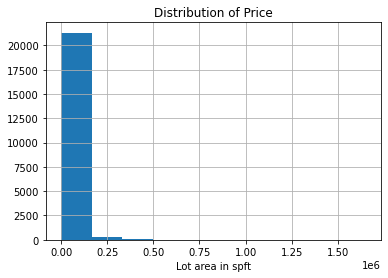

In [29]:
# View price distribution
df['sqft_lot'].hist()
plt.xlabel('Lot area in spft')
plt.title('Distribution of Price')
plt.show()

## Ploting

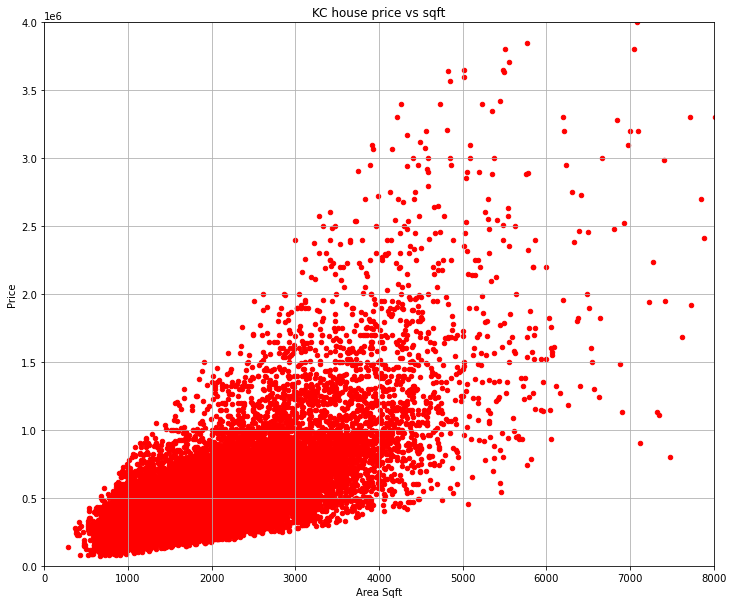

In [30]:
#plt.scatter(df.loc ['sqft_lot'],            df.loc ['price'],             )

df.plot(kind='scatter',x= 'sqft_living',y='price',color='red',figsize = (12,10), grid = True)
plt.gca().set(xlim=(0.0, 8000), ylim=(0, 4000000) )
plt.xlabel('Area Sqft')
plt.ylabel('Price')
plt.title('KC house price vs sqft')
plt.show()

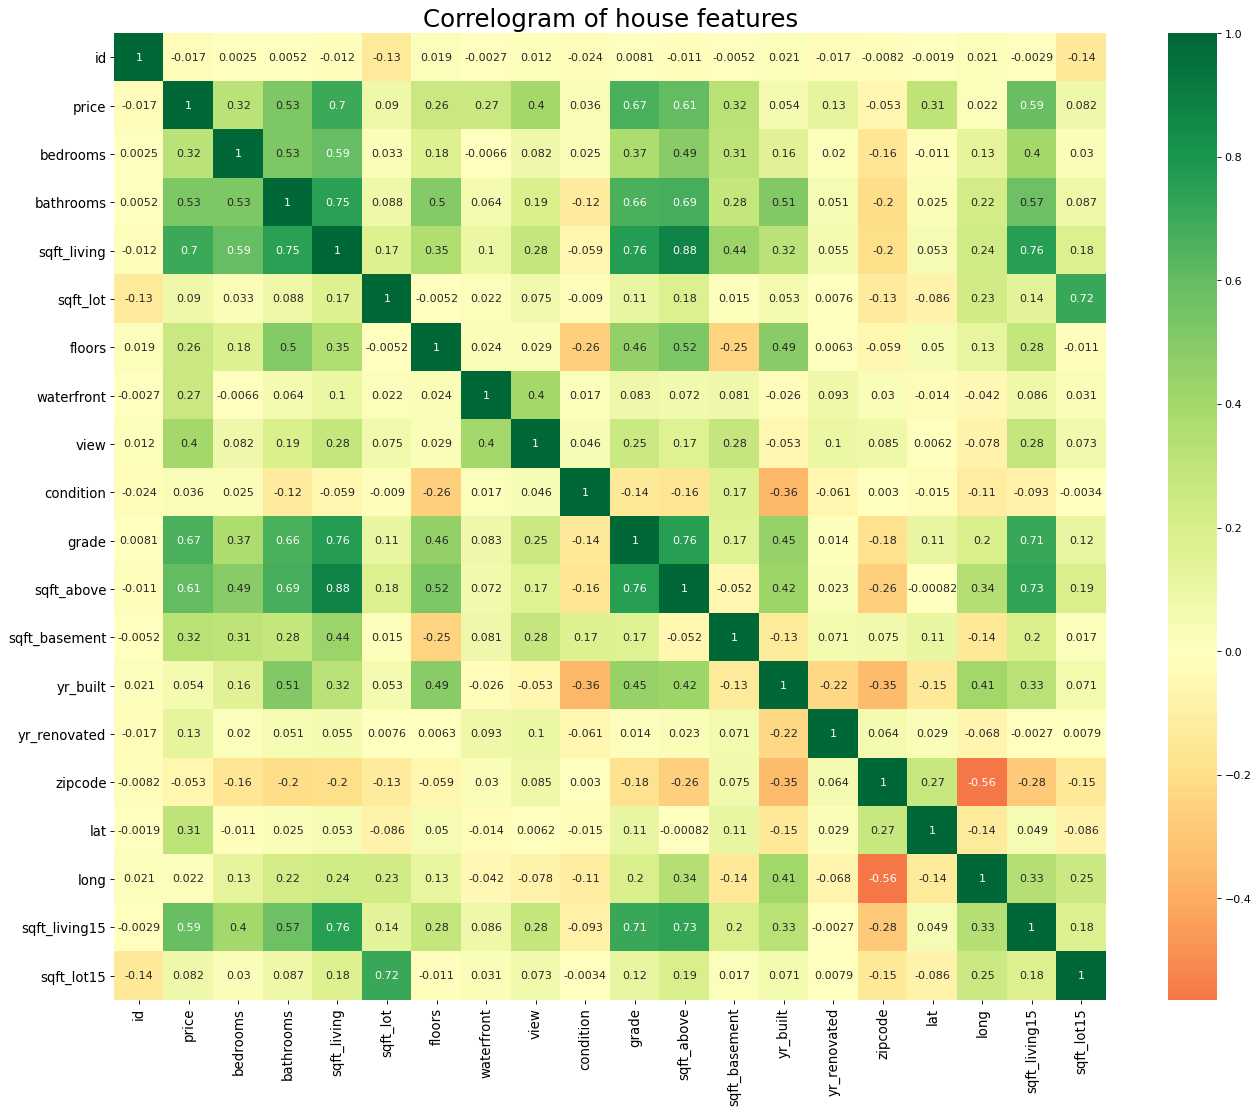

In [31]:
# Plot
plt.figure(figsize=(20,16), dpi= 80)
sns.heatmap(df.corr(), xticklabels=df.corr().columns, yticklabels=df.corr().columns, cmap='RdYlGn', center=0, annot=True)

# Decorations
plt.yticks(fontsize=12)
plt.title('Correlogram of house features', fontsize=22)
plt.xticks(fontsize=12)
plt.show()

In [32]:
# create a copy of df with price less than 2 million
df_less2 = df[df['price'] <= 2000000]

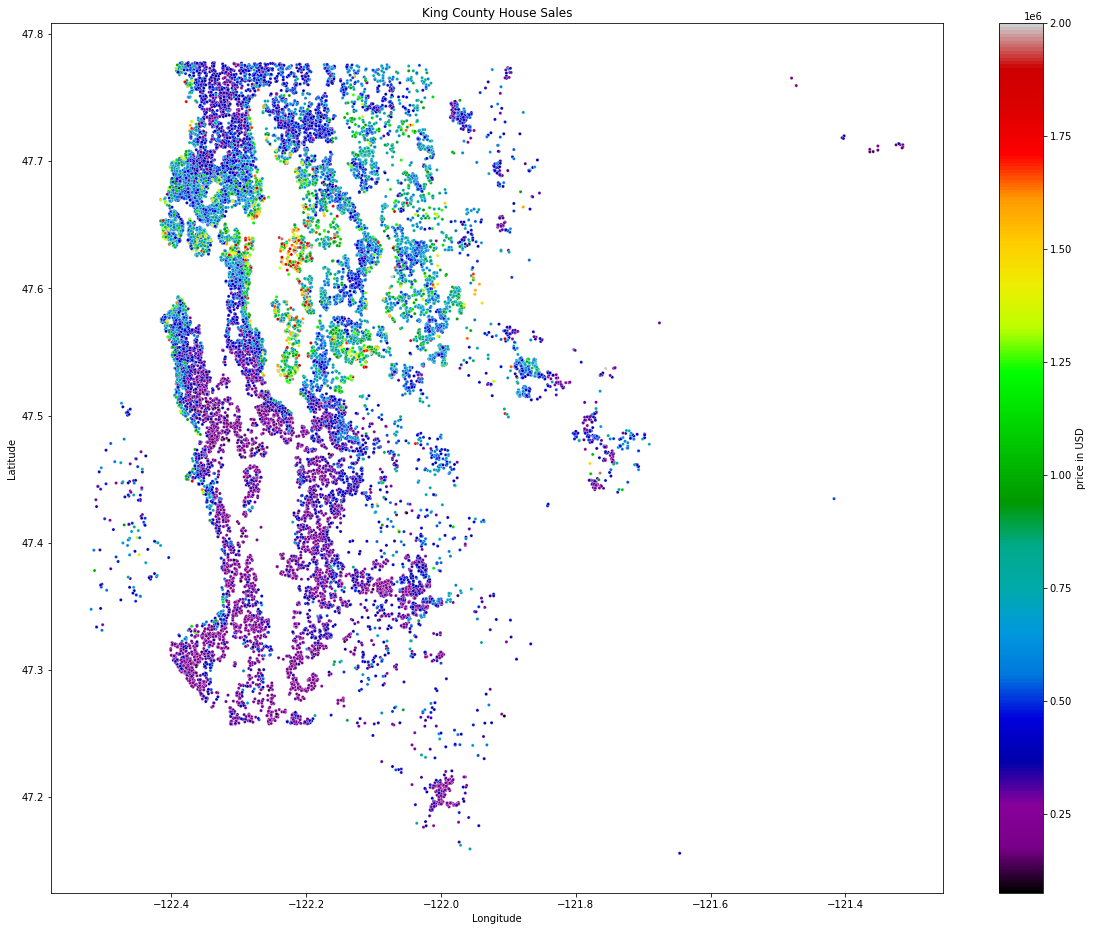

In [33]:
# Plot scatter plot
plt.figure(figsize = (20,16))
ax = sns.scatterplot(x = df_less2['long'], y = df_less2['lat'], hue = df_less2['price'],
                palette = 'nipy_spectral',s=10, legend = None, data = df_less2)

norm = plt.Normalize(df_less2['price'].min(), df_less2['price'].max())
smap = plt.cm.ScalarMappable(cmap='nipy_spectral', norm=norm)
smap.set_array([])

ax.figure.colorbar(smap, label = 'price in USD')

plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('King County House Sales')
plt.show()

### Investigate Zipcode 

In [34]:
df_less2.shape

(21415, 21)

In [35]:
# Explore zipcode
df_less2['zipcode'].value_counts()

98103    602
98038    590
98115    582
98052    573
98117    553
        ... 
98010    100
98102    100
98024     81
98148     57
98039     29
Name: zipcode, Length: 70, dtype: int64

In [36]:
# Extract price and zipcode from our dataset
df_zip = df_less2[['zipcode', 'price']]

In [37]:
df_zip

,zipcode,price
0,98178,221900.0
1,98125,538000.0
2,98028,180000.0
3,98136,604000.0
4,98074,510000.0
...,...,...
21608,98103,360000.0
21609,98146,400000.0
21610,98144,402101.0
21611,98027,400000.0


In [38]:
# Groupby zipcode and take median price
df_zipmean = df_zip.groupby(df_zip['zipcode']).median()

In [39]:
df_zipmean

,price
zipcode,
98001,260000.0
98002,235000.0
98003,267475.0
98004,1032250.0
98005,765475.0
...,...
98177,540000.0
98178,278277.0
98188,264000.0


In [40]:
# Reset index after groupy
df_zipmean = df_zipmean.reset_index()

# Change type to str
df_zipmean['zipcode'] = df_zipmean['zipcode'].astype(str)

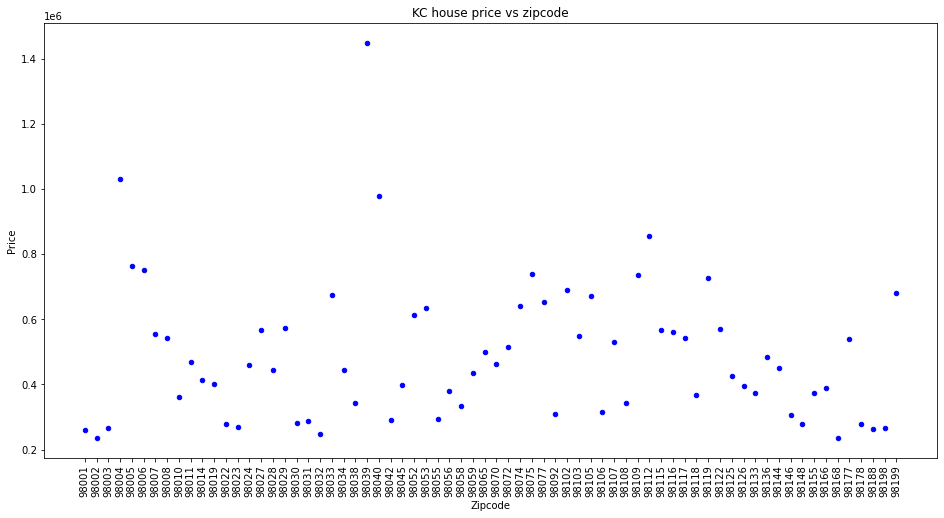

In [41]:
df_zipmean.plot(kind='scatter',x='zipcode', y='price', color='blue',figsize = (16,8))
# sns.scatterplot (x = df_zipmean['price'], y = df_zipmean['zipcode'], data = df_zipmean)
plt.xlabel('Zipcode')
plt.xticks(rotation = 90)
plt.ylabel('Price')
plt.title('KC house price vs zipcode')
plt.show()

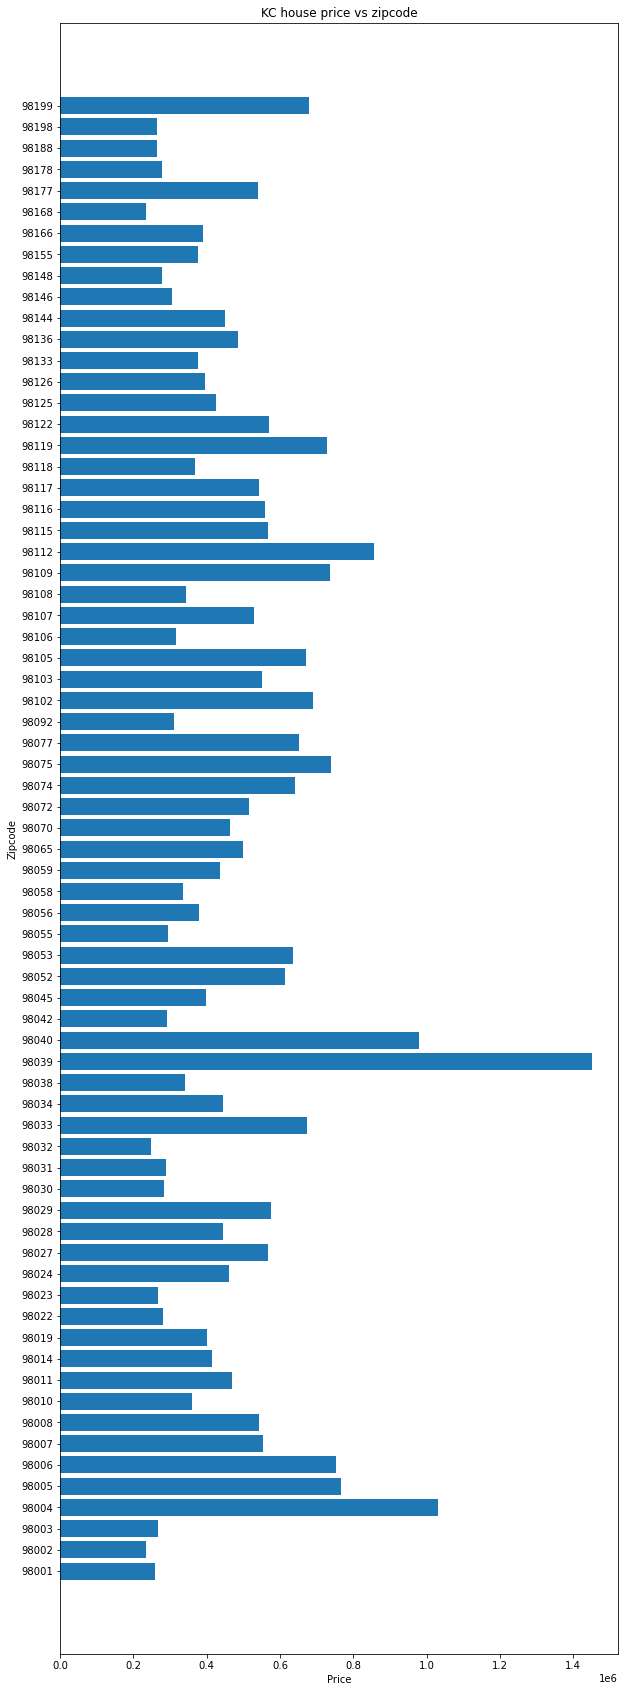

In [42]:
plt.figure(figsize = (10,30))

plt.barh(df_zipmean['zipcode'],df_zipmean['price'])
plt.ylabel('Zipcode')

plt.xlabel('Price')
plt.title('KC house price vs zipcode')
plt.show()

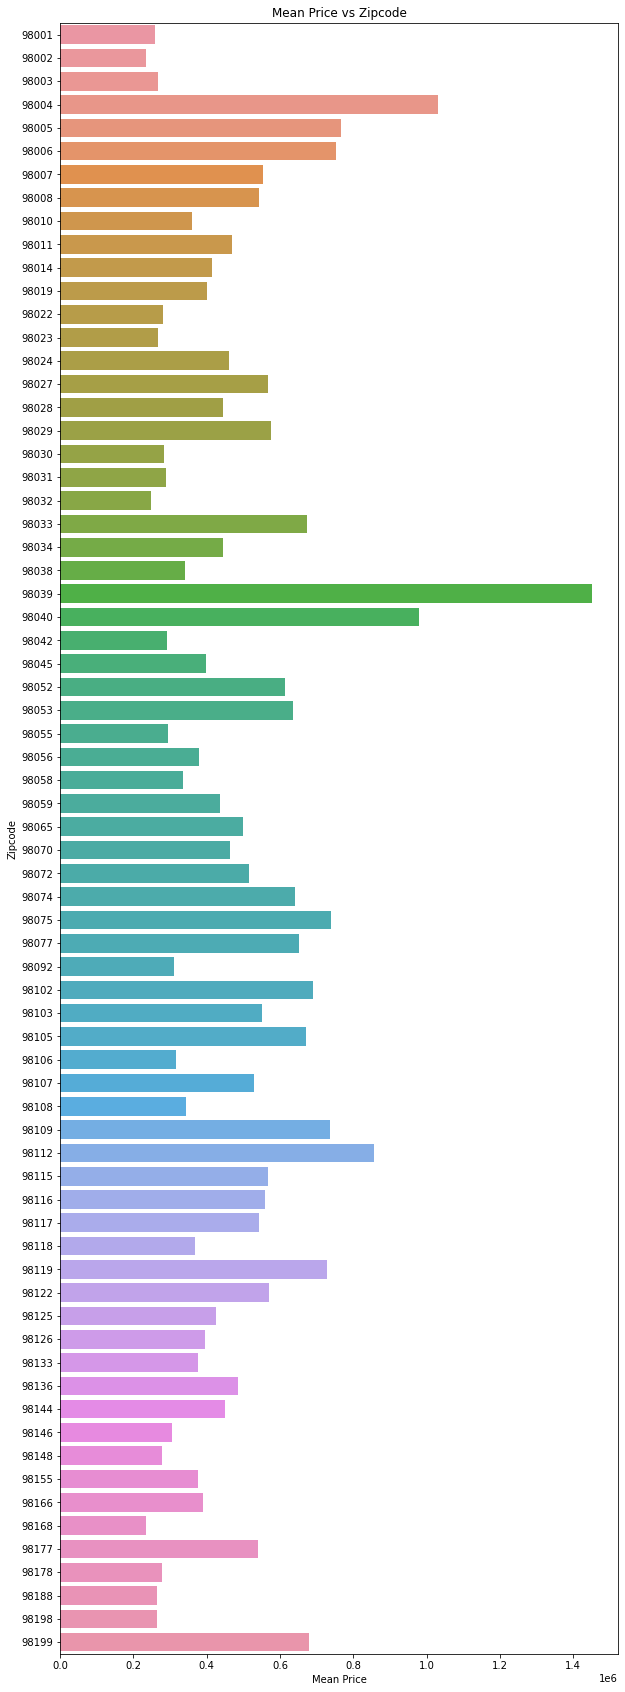

In [43]:
plt.figure(figsize = (10,30))
sns.barplot(x = df_zipmean['price'], y = df_zipmean['zipcode'], data = df_zipmean)
plt.title('Mean Price vs Zipcode')
plt.xlabel('Mean Price')
plt.ylabel('Zipcode')
plt.show()

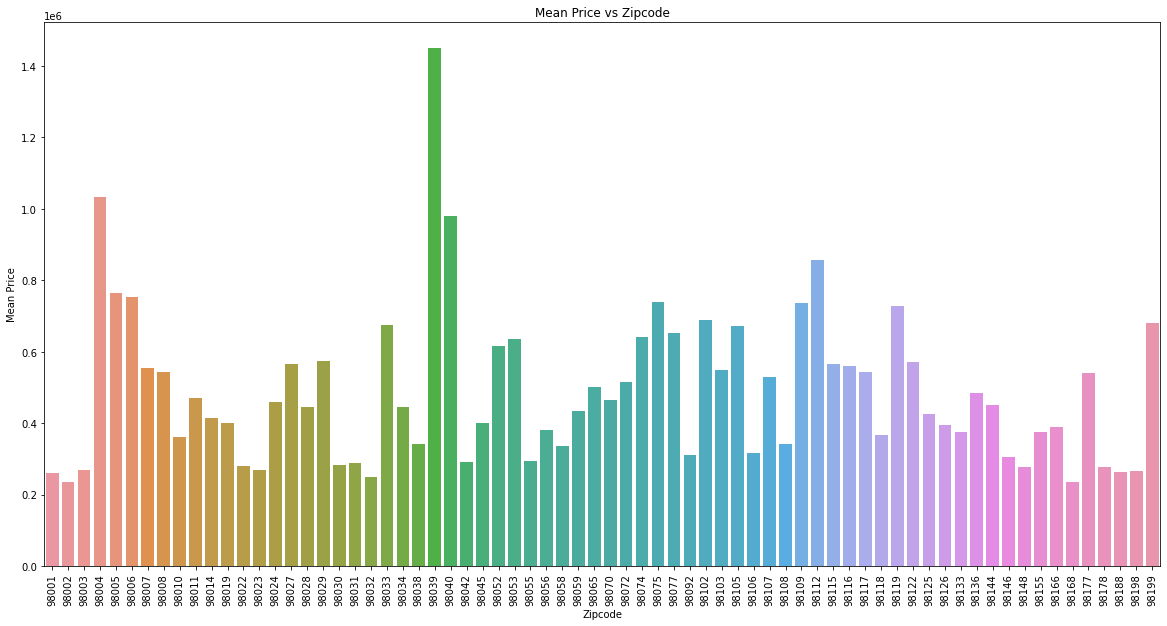

In [44]:
plt.figure(figsize = (20,10))
sns.barplot( x = df_zipmean['zipcode'],y = df_zipmean['price'], data = df_zipmean)
plt.title('Mean Price vs Zipcode')
plt.ylabel('Mean Price')
plt.xlabel('Zipcode')
plt.xticks(rotation = 90)
plt.show()

In [45]:
# Get top 10 zipcode mean prices
dftop10 = df_zipmean.sort_values('price', ascending = False)[:10]

In [46]:
dftop10

,zipcode,price
24,98039,1450000.0
3,98004,1032250.0
25,98040,980000.0
48,98112,855500.0
4,98005,765475.0
5,98006,752152.5
38,98075,739894.0
47,98109,736000.0
53,98119,727000.0
41,98102,690000.0


## Price vs Features

### Binary features - Waterfront

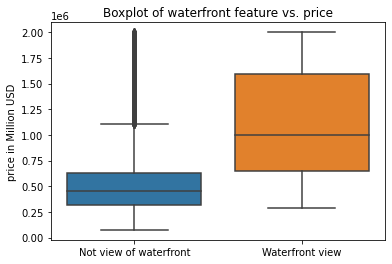

In [47]:
# Plot boxplot of waterfront feature
sns.boxplot(x = df_less2['waterfront'], y = df['price'])
plt.title("Boxplot of waterfront feature vs. price")
plt.ylabel("price in Million USD")
plt.xlabel(None)
plt.xticks(np.arange(2), ('Not view of waterfront', 'Waterfront view'))
plt.show()

In [48]:
waterfrontmean = df_less2[df_less2['waterfront'] == 1]['price'].mean()
nonwaterfrontmean = df_less2[df_less2['waterfront'] == 0]['price'].mean()
print(f"The mean house price for a house with waterfront view is USD {round(waterfrontmean,2)}")
print(f"The mean house price for a house without waterfront view is USD {round(nonwaterfrontmean,2)}")

The mean house price for a house with waterfront view is USD 1100167.45
The mean house price for a house without waterfront view is USD 516230.38


In [49]:
# Percentage of house with frontwater view
Water_percentage =len(df_less2[df_less2['waterfront'] == 1])/len(df_less2)*100
print ('Percentage of house have waterfront view is ' ,Water_percentage , "%")

Percentage of house have waterfront view is  0.5463460191454588 %


### Categorical features

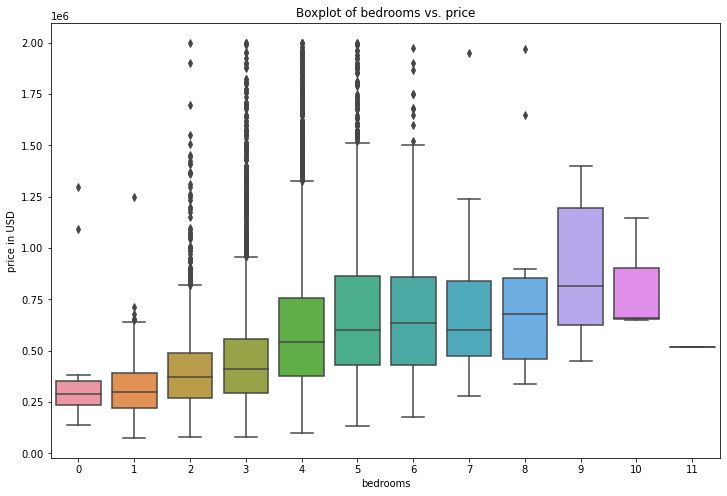

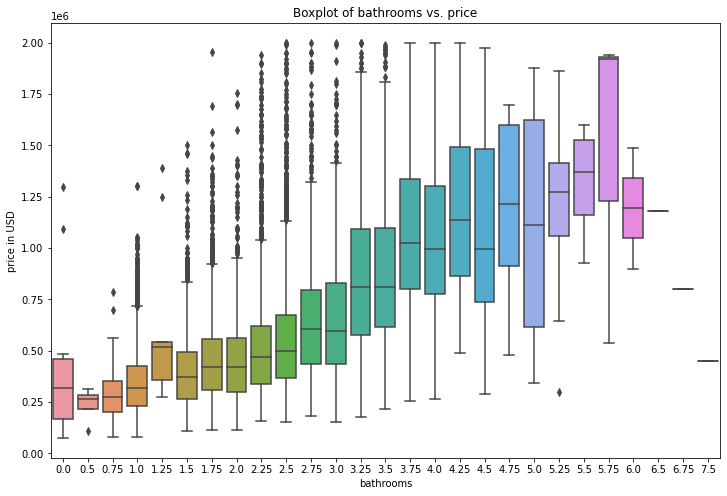

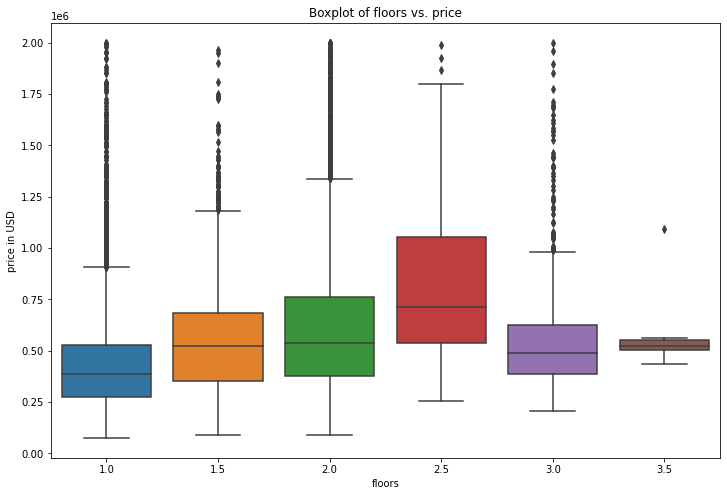

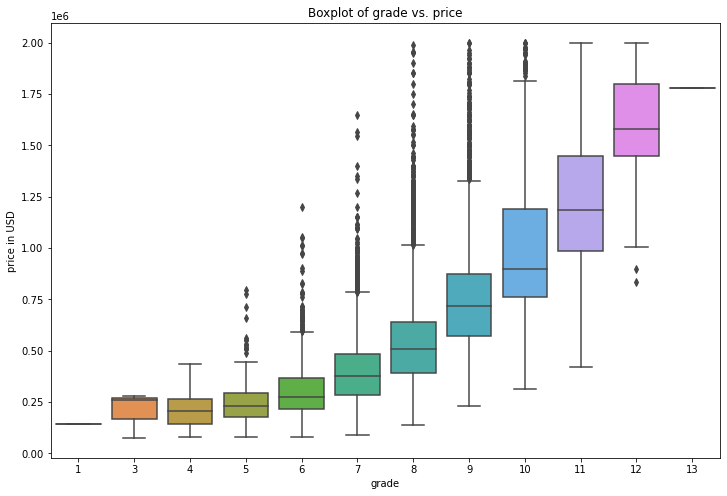

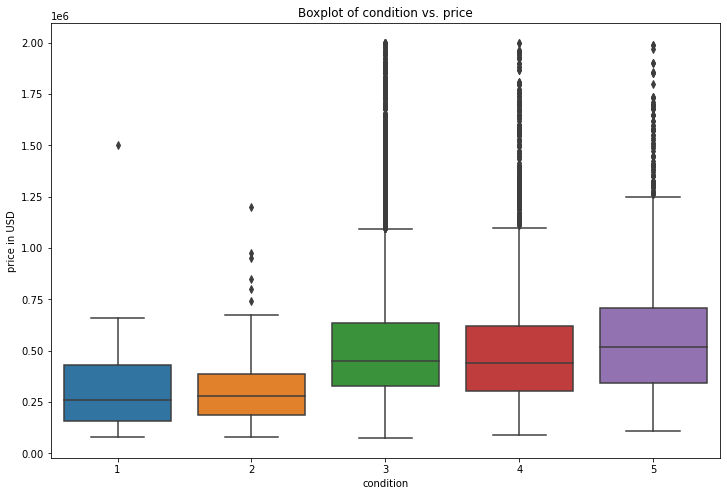

In [50]:
# Define categorical variables
categorical_features = ['bedrooms', 'bathrooms', 'floors','grade', 'condition']

# Plot boxplots
for feature in categorical_features:
    plt.figure(figsize = (12,8))
    sns.boxplot(x = df_less2[feature], y = df_less2['price'])
    plt.title(f"Boxplot of {feature} vs. price")
    plt.ylabel("price in USD")
    plt.xlabel(f"{feature}")
    plt.show()

### Continuous features

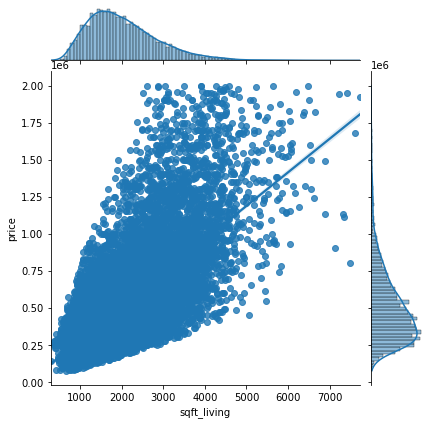

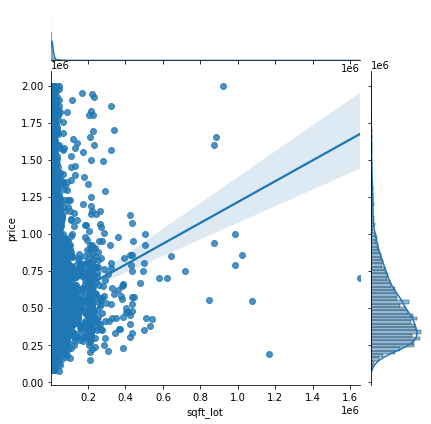

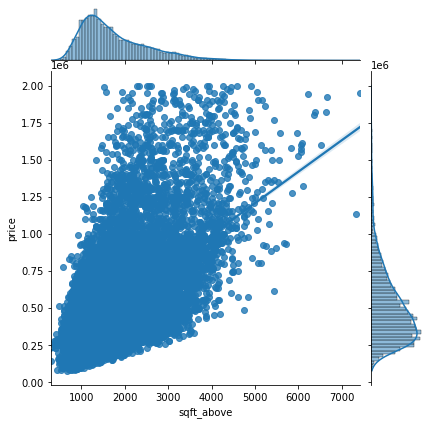

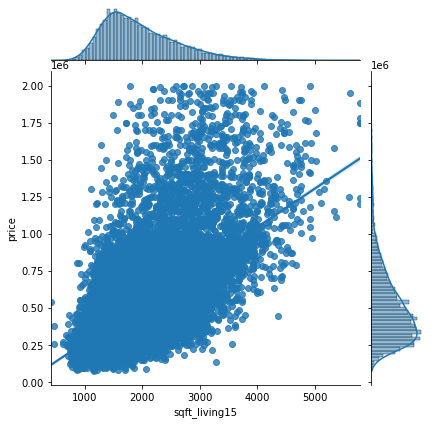

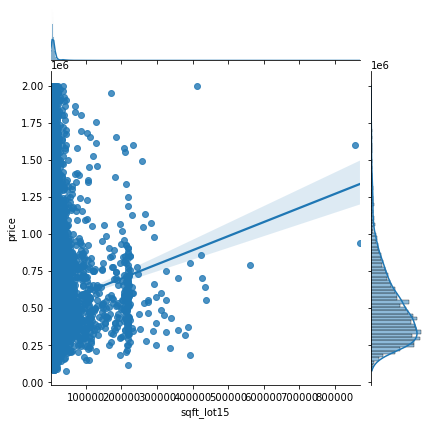

In [51]:
# Define list of continuous variables
continous_features = ['sqft_living', 'sqft_lot', 'sqft_above', 'sqft_living15', 'sqft_lot15']


#  Plot jointplots
for feature in continous_features:
    sns.jointplot(x = df_less2[feature], y = df_less2['price'], kind = 'reg')


## Selcect features and clean data

In [52]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [53]:
 df_clean = df_less2.drop(['id', 'date','sqft_above','sqft_lot', 'sqft_living15', 
                           'sqft_lot15','floors','view','condition','lat', 'long',
                          'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',], axis = 1)

In [54]:
df_clean.head()

,price,bedrooms,bathrooms,sqft_living,waterfront,grade
0,221900.0,3,1.00,1180,0,7
1,538000.0,3,2.25,2570,0,7
2,180000.0,2,1.00,770,0,6
3,604000.0,4,3.00,1960,0,7
4,510000.0,3,2.00,1680,0,8


## Train-Test Split Data

In [55]:
from statsmodels.formula.api import ols
import statsmodels.api as sm
import scipy.stats as stats
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score, mean_squared_error

In [56]:
# Split features X and target y
X = df_clean.drop('price', axis = 1)
y = df_clean['price']

In [57]:
# Train-test split (10% to test set)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [58]:
# A brief preview of train-test split
print(len(X_train), len(X_test), len(y_train), len(y_test))

19273 2142 19273 2142


#### Use sqft_living as a single feature to model

In [59]:
X_train_sq =np.array(X_train['sqft_living']).reshape(-1,1)


In [60]:
X_train_sq

array([[2430],
       [1580],
       [1310],
       ...,
       [1580],
       [1620],
       [1370]])

In [61]:
y_train

4069      405000.0
19316     221347.0
5573      181000.0
240       225000.0
17108     540000.0
           ...    
11380     275000.0
12067    1195000.0
5444      325000.0
871       469950.0
15933     525000.0
Name: price, Length: 19273, dtype: float64

In [62]:
y_train_sq = np.array(y_train).reshape(-1,1)

In [63]:
y_train_sq

array([[405000.],
       [221347.],
       [181000.],
       ...,
       [325000.],
       [469950.],
       [525000.]])

In [64]:
# Create linear regression object
linreg = LinearRegression()

# Fit on training data
linreg.fit(X_train_sq, y_train_sq)

# Evaluate using rmse
scores = cross_val_score(
            linreg, 
            X_train,
            y_train,
            cv=10,
            scoring="neg_mean_squared_error"
)

rmse_scores = np.sqrt(-scores)
display(rmse_scores)
display(rmse_scores.mean())
display(rmse_scores.std())

array([190001.24731955, 189656.54793688, 193370.45513148, 190874.69751172,
       189992.73239866, 197479.42721958, 197271.71433308, 190569.51707843,
       201226.04527513, 196605.22514383])

193704.7609348335

3921.576770619373

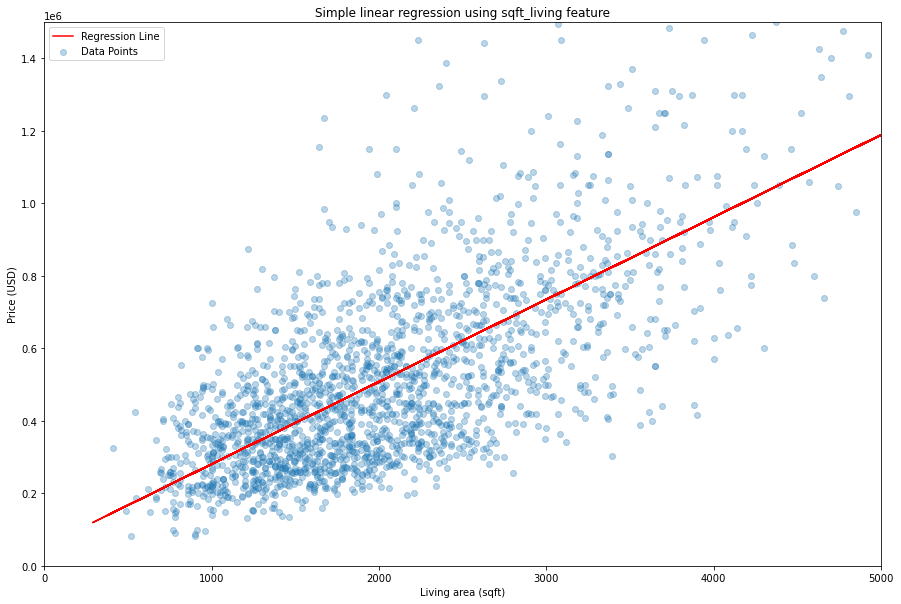

In [65]:

# Create visualisation of simple linear regression

# Get predictions
y_pred_sq = linreg.predict(X_train_sq)
# Plot data points
plt.figure(figsize = (15,10))
plt.scatter(x = X_train_sq[:2000], y = y_train_sq[:2000], alpha = 0.3, label = 'Data Points')
plt.gca().set(xlim=(0.0, 5000), ylim=(0, 1500000) )
# Plot regression line
plt.plot(X_train_sq, y_pred_sq, color = 'red', label = 'Regression Line')
plt.legend()
plt.title('Simple linear regression using sqft_living feature')
plt.xlabel('Living area (sqft)')
plt.ylabel('Price (USD)')
plt.show()

In [66]:
X_test

,bedrooms,bathrooms,sqft_living,waterfront,grade
14437,3,2.0,1510,0,7
3310,3,2.5,2120,0,7
2905,3,1.5,1690,0,7
5214,4,3.5,3430,0,11
10933,3,1.0,1160,0,7
...,...,...,...,...,...
9777,3,2.0,2860,0,9
13891,3,1.0,1200,0,7
2049,2,2.0,1680,0,8
14860,3,2.0,1840,0,6


In [67]:
X_test_sq =np.array(X_test['sqft_living']).reshape(-1,1)

In [68]:
y_test_sq = np.array(y_test).reshape(-1,1)

In [69]:
y_pred_test_sq = linreg.predict(X_test_sq)

In [70]:
y_pred_test_sq[1]

array([535056.83169631])

In [71]:
y_test_sq[1]

array([400000.])

In [72]:
data_array = np.hstack([X_test_sq,y_test_sq,y_pred_test_sq])

In [73]:
data_array

array([[  1510.        , 234950.        , 396497.88884458],
       [  2120.        , 400000.        , 535056.83169631],
       [  1690.        , 430000.        , 437384.13427624],
       ...,
       [  1680.        , 575000.        , 435112.67619671],
       [  1840.        , 521000.        , 471456.00546929],
       [  1840.        , 300000.        , 471456.00546929]])

/Users/xiehaoyang/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


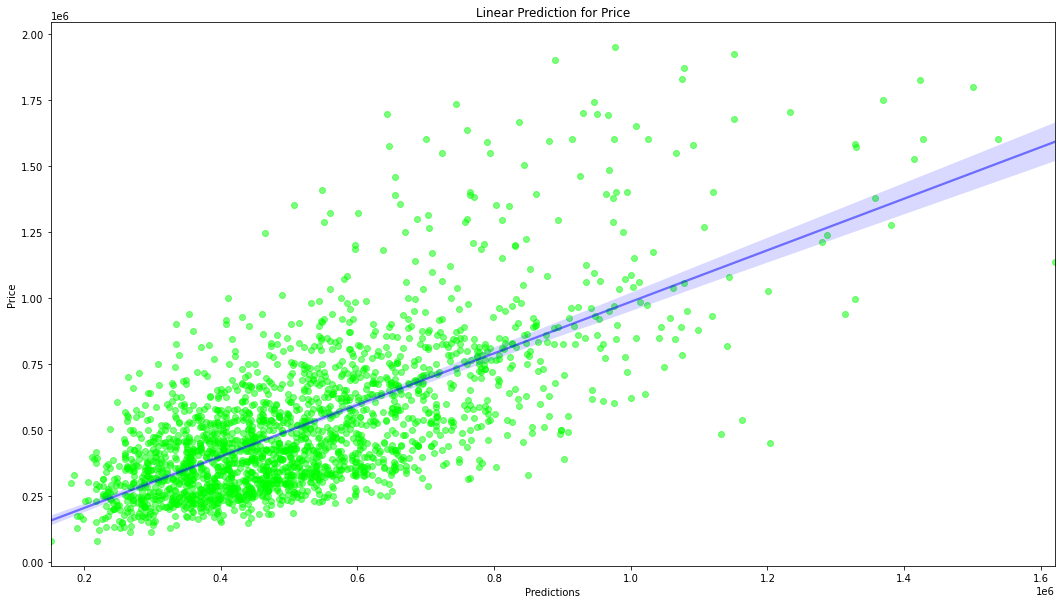

In [74]:
#Visualising the linear predicition for price
fig = plt.figure(figsize=(18,10))
sns.regplot(y_pred_test_sq,y_test_sq,scatter_kws={'alpha':0.5,'color':'lime'},line_kws={'color':'blue','alpha':0.5})
plt.xlabel('Predictions')
plt.ylabel('Price')
plt.title("Linear Prediction for Price")
plt.show()

## Fit all the selected features into the Linear Regression Model using scikit learn

In [75]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
df_less2.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

## Try different features

In [76]:
features = ['sqft_living', 'grade','sqft_above','sqft_living15','bathrooms',]

df_less2['price'].describe()

count    2.141500e+04
mean     5.194207e+05
std      2.878146e+05
min      7.500000e+04
25%      3.200000e+05
50%      4.500000e+05
75%      6.350000e+05
max      2.000000e+06
Name: price, dtype: float64

In [77]:
def fit_price(df = df_less2):
    price = df['price']
    return price

def fit_features(fea = features, df = df_less2):
    list1 = []
    list2 = []
    for i in range(len(df.columns)):
        list1.append(df.columns[i])
    for i in range(len(df.columns)):
        if(df.columns[i] not in fea):
            list2.append(df.columns[i])
    df = df.drop(list2,axis=1)
    return df
    

In [78]:

def multiple_features(fea = features, price = fit_price(), df = fit_features()):
    list = []
    for i in range(len(fea)):
        list.append(df[fea[i]].values)
    X = np.array(list).T
    Y = np.array(price)  
    # Model Intialization
    reg = LinearRegression()
    # Data Fitting
    reg = reg.fit(X, Y)
    # Y Prediction
    Y_pred = reg.predict(X)
    rmse = np.sqrt(mean_squared_error(Y, Y_pred))
    r_score = reg.score(X, Y)
    print('rmse:', rmse)
    print('regression score:', r_score)
    print('coefficient:',reg.coef_)
    print('intercept:',reg.intercept_) 
    return  reg, Y, Y_pred, reg.coef_, reg.intercept_
    

In [79]:
multiple_features()

rmse: 194376.63203101733
regression score: 0.5438763020283044
coefficient: [ 1.71112446e+02  1.04926609e+05 -7.33104219e+01  4.57188506e+01
 -2.55205636e+04]
intercept: -539250.9427707517


(LinearRegression(),
 array([221900., 538000., 180000., ..., 402101., 400000., 325000.]),
 array([346384.40757627, 495754.28309166, 264450.98216816, ...,
        322486.19241613, 457307.34122843, 322486.19241613]),
 array([ 1.71112446e+02,  1.04926609e+05, -7.33104219e+01,  4.57188506e+01,
        -2.55205636e+04]),
 -539250.9427707517)

In [80]:
reg, Y, Y_pred, coef, inter = multiple_features()

rmse: 194376.63203101733
regression score: 0.5438763020283044
coefficient: [ 1.71112446e+02  1.04926609e+05 -7.33104219e+01  4.57188506e+01
 -2.55205636e+04]
intercept: -539250.9427707517


In [82]:
dataset = pd.read_csv("dataset/kc_house_data_fit.csv")
dataset = dataset[dataset['price'] <= 2000000]

/Users/xiehaoyang/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


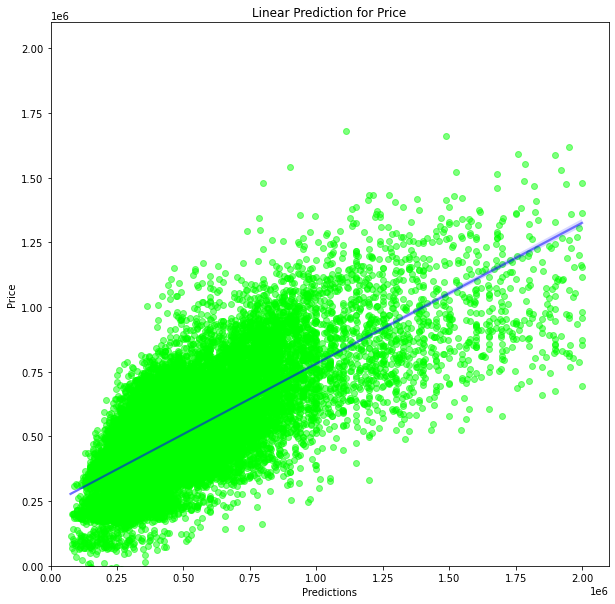

In [83]:
fig = plt.figure(figsize=(10,10))
sns.regplot(Y,Y_pred,scatter_kws={'alpha':0.5,'color':'lime'},line_kws={'color':'blue','alpha':0.5})
plt.xlabel('Predictions')
plt.ylabel('Price')
plt.xlim(0,2100000)
plt.ylim(0,2100000)
plt.title("Linear Prediction for Price")
fig = plt.gcf()
fig.savefig('harvey.jpg')
plt.show()